In [1]:
import main
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


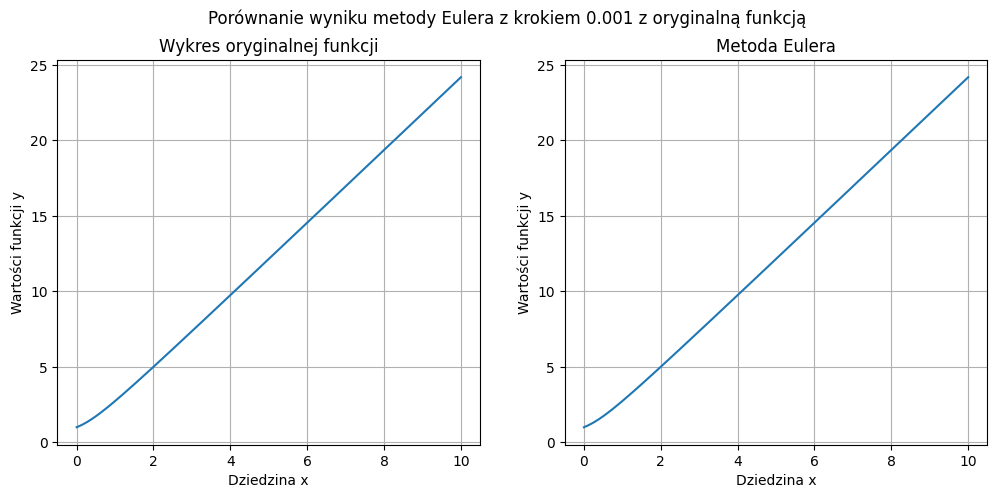

In [2]:
h = 0.001
t = np.arange(0, 10, h)
df = lambda t, x: (x+t)/(x-t)
f = lambda t: t+np.sqrt(1+2*np.power(t, 2))
x0 = np.array([1])

plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
ax.plot(t, f(t))
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Wykres oryginalnej funkcji')

result = main.solve_euler(df, t, x0)

ax = plt.subplot(1, 2, 2)
ax.plot(t, result)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Metoda Eulera')
plt.suptitle(t='Porównanie wyniku metody Eulera z krokiem ' + str(h) + ' z oryginalną funkcją')
plt.show()

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

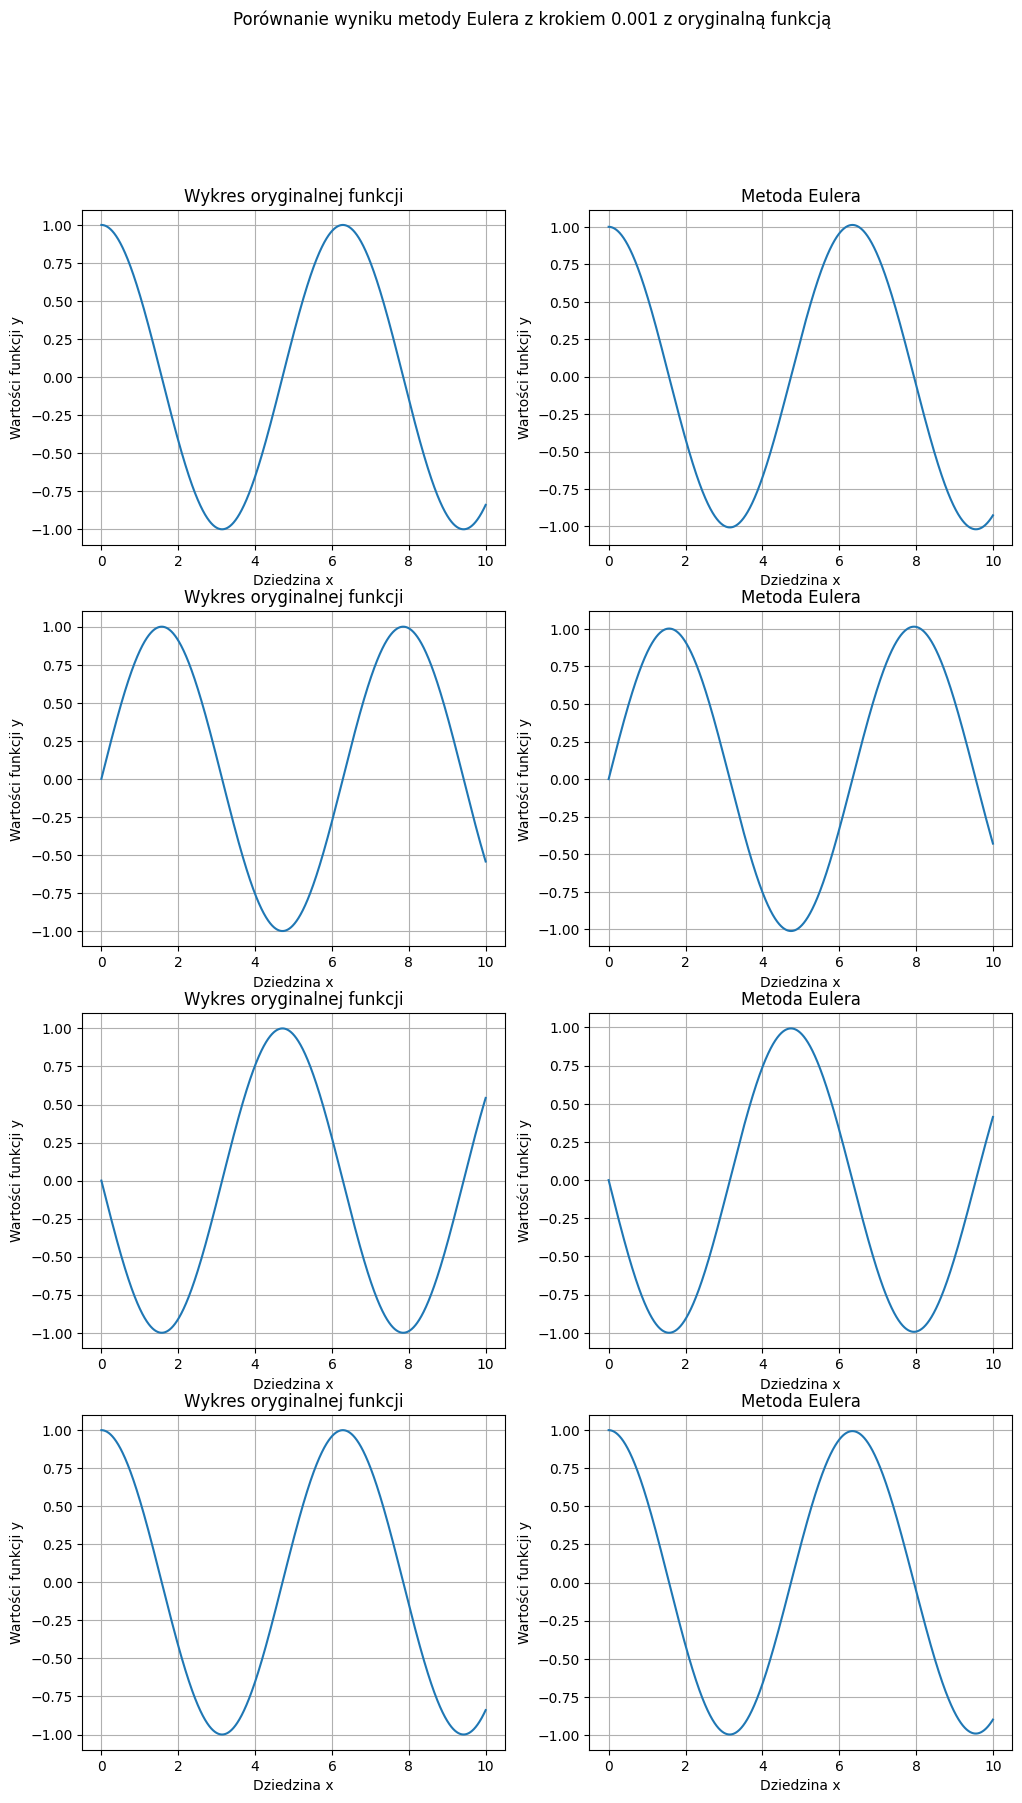

In [3]:
h = 0.001
x0 = np.array([[1, 0, 0, 1]], dtype=object)
t = np.arange(0, 10, h)
def df(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0]/np.power(((x[0])**2+(x[1])**2), 1.5)
    x4 = -x[1]/np.power(((x[0])**2+(x[1])**2), 1.5)
    return np.array([[x1, x2, x3, x4]])

result = main.solve_euler(df, t, x0)
result = result.T
x1 = result[0]
x2 = result[1]
x3 = result[2]
x4 = result[3]

plt.figure(figsize=(12, 20))
plt.suptitle(t='Porównanie wyniku metody Eulera z krokiem ' + str(h) + ' z oryginalną funkcją')

ax = plt.subplot(4, 2, 1)
ax.plot(t, np.cos(t))
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Wykres oryginalnej funkcji')

ax = plt.subplot(4, 2, 2)
ax.plot(t, x1)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Metoda Eulera')

ax = plt.subplot(4, 2, 3)
ax.plot(t, np.sin(t))
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Wykres oryginalnej funkcji')

ax = plt.subplot(4, 2, 4)
ax.plot(t, x2)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Metoda Eulera')

ax = plt.subplot(4, 2, 5)
ax.plot(t, -np.sin(t))
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Wykres oryginalnej funkcji')

ax = plt.subplot(4, 2, 6)
ax.plot(t, x3)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Metoda Eulera')

ax = plt.subplot(4, 2, 7)
ax.plot(t, np.cos(t))
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Wykres oryginalnej funkcji')

ax = plt.subplot(4, 2, 8)
ax.plot(t, x4)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Metoda Eulera')

plt.show()

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

Dokładne rozwiązania tego równania obliczone za pomocą kalkulatora ze strony https://mathdf.com/dif/pl/ to:
$$
\begin{array}{l}
\dot{x_1}(t)={\frac{1}{e^t} - \frac{1}{e^{1000t}}}\\\\
\dot{x_2}(t)={\frac{2}{e^t} + \frac{1}{e^{1000t}}}
\end{array}
$$

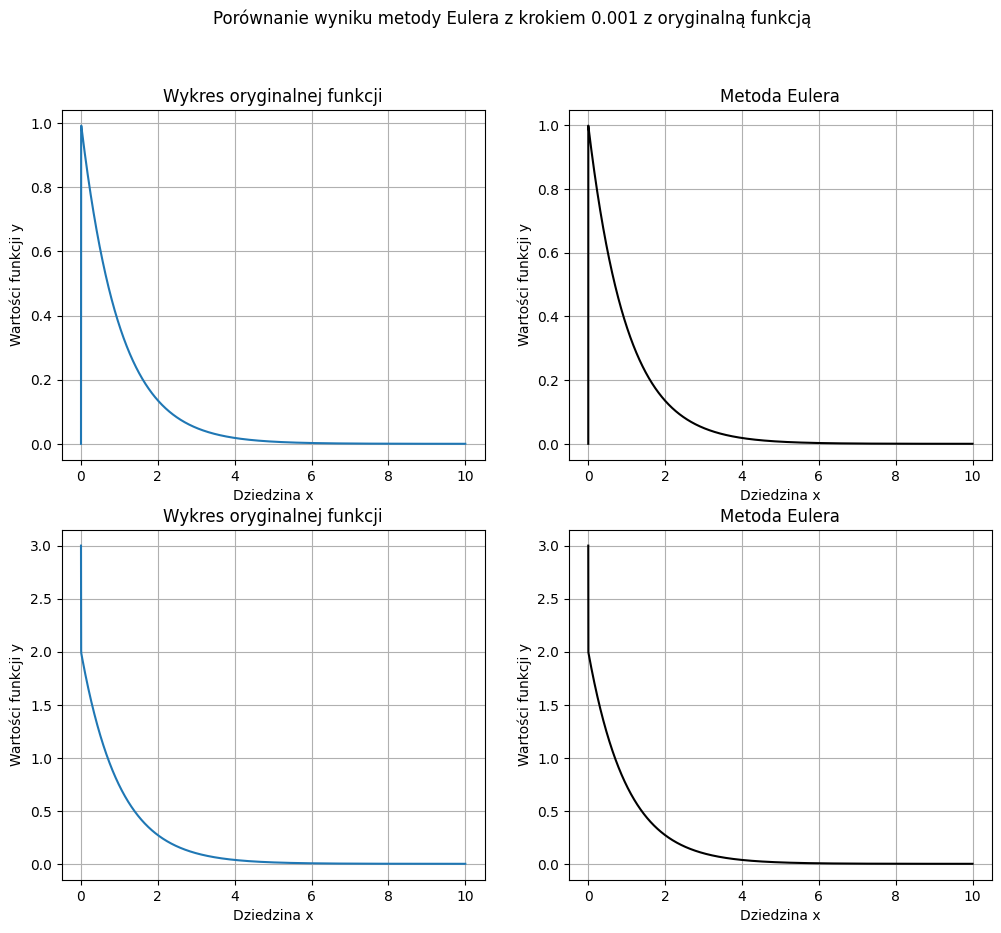

In [4]:
h = 0.001
x0 = np.array([[0, 3]])
t = np.arange(0, 10, h)

# obliczone za pomocą innego narzędzia faktyczne rozwiązania
f1 = lambda t: np.exp(-t) - np.exp(-1000*t)
f2 = lambda t: 2*np.exp(-t) + np.exp(-1000*t)

def df(t, x):
    A = np.array([[-667, 333],[666, -334]])
    res = A@(np.array([x])).T
    res = res.T[0]
    return res

result = main.solve_euler(df, t, x0)
result = result.T
x1 = result[0]
x2 = result[1]

plt.figure(figsize=(12, 10))
plt.suptitle(t='Porównanie wyniku metody Eulera z krokiem ' + str(h) + ' z oryginalną funkcją')

ax = plt.subplot(2, 2, 1)
ax.plot(t, f1(t))
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Wykres oryginalnej funkcji')

ax = plt.subplot(2, 2, 2)
ax.plot(t, x1, 'k')
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Metoda Eulera')

ax = plt.subplot(2, 2, 3)
ax.plot(t, f2(t))
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Wykres oryginalnej funkcji')

ax = plt.subplot(2, 2, 4)
ax.plot(t, x2, 'k')
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='Metoda Eulera')
plt.show()

***Zadanie 5.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

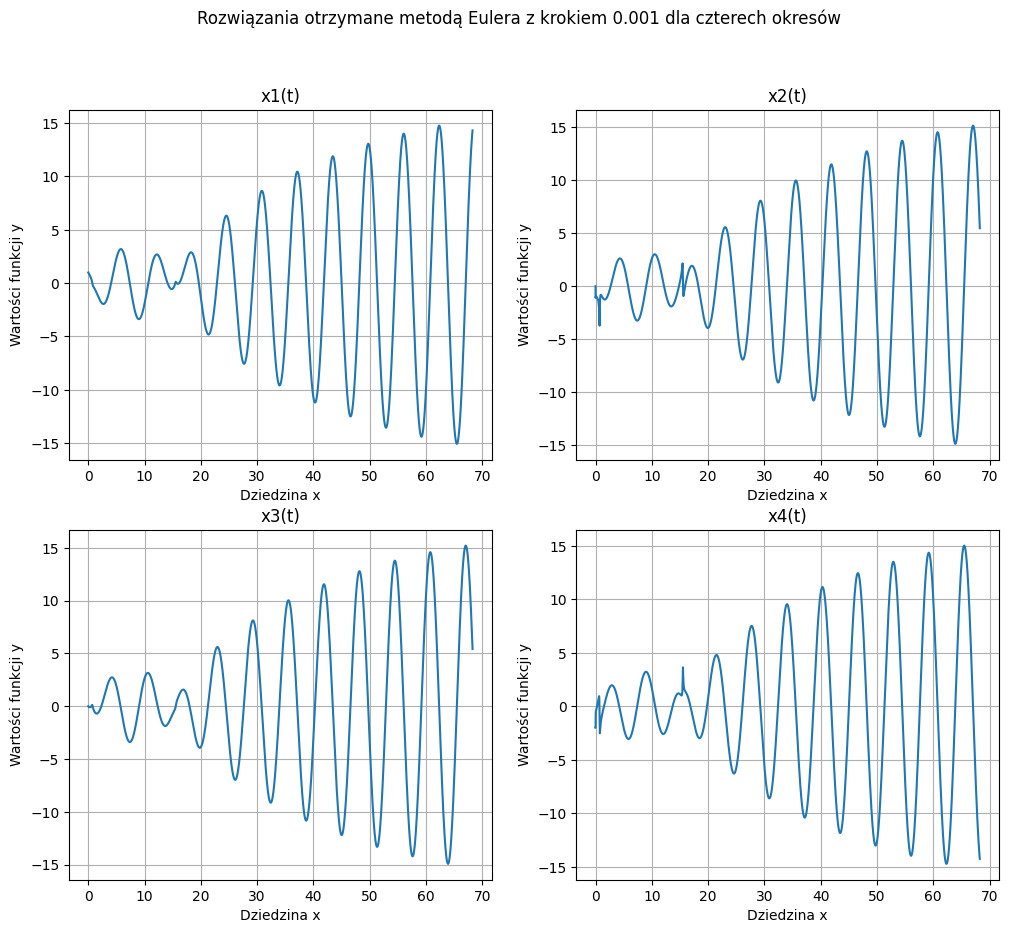

In [5]:
h = 0.001
u = 0.012277471
u_prim = 1-u
x0 = np.array([[0.994, 0, 0, -2.00158510637908252240537862224]], dtype=object)
T = 17.0652165601579625588917206249
t = np.arange(0, 4*T, h)

def df(t, x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    D1 = np.power((x1+u)**2 + x3**2, 1.5)
    D2 = np.power((x1-u_prim)**2 + x3**2, 1.5)
    x1_return = x2
    x2_return = x1 + 2*x4 - u_prim*(x1+u)/D1-u*(x1-u_prim)/D2
    x3_return = x4
    x4_return = x3 - 2*x2 - u_prim*x3/D1 - u*x3/D2
    return np.array([x1_return, x2_return, x3_return, x4_return], dtype=object)

result = main.solve_euler(df, t, x0)
result = result.T
x1 = result[0]
x2 = result[1]
x3 = result[2]
x4 = result[3]

plt.figure(figsize=(12, 10))
plt.suptitle(t='Rozwiązania otrzymane metodą Eulera z krokiem ' + str(h) + ' dla czterech okresów')

ax = plt.subplot(2, 2, 1)
ax.plot(t, x1)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='x1(t)')

ax = plt.subplot(2, 2, 2)
ax.plot(t, x2)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='x2(t)')

ax = plt.subplot(2, 2, 3)
ax.plot(t, x3)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='x3(t)')

ax = plt.subplot(2, 2, 4)
ax.plot(t, x4)
ax.grid()
ax.set(xlabel='Dziedzina x', ylabel='Wartości funkcji y')
plt.title(label='x4(t)')

plt.show()

$Wnioski$: 
Laboratorium pozwoliło zapoznać się z metodą Eulera pozwalającą na wyznaczanie rozwiązań numerycznych równań różniczkowych.
Z tą metodą zdążyłem spotkać się już podczas trwania kursu innego przedmiotu, jednak tutaj mogłem dokładnie zaobserwować jej działanie. Szczególnie przy czwartym zadaniu zauważyłem jak dużą rolę gra krok różniczkowania. Zmieniając krok mogłem również zdać sobie sprawę jak znacznie zmienia się czas obliczeń. 

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
